In [110]:
#EDA libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#starting with machine learnig prediction
from sklearn.model_selection import train_test_split, GridSearchCV
#prediction libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [111]:
# loading my csv dataset

com_df = pd.read_csv('/kaggle/input/e-commerce-customer-churn/data_ecommerce_customer_churn.csv')
com_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [112]:
# seeing the shape of my data
com_df.shape

(3941, 11)

In [113]:
# information
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [114]:
# getting a brief overview of statistical analysis
com_df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [115]:
# obseving the null values im my dataset

null_vis = com_df.isnull().sum()
null_vis

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [116]:
# filling na with mean of the columns
com_df = com_df.fillna(com_df[['Tenure','WarehouseToHome', 'DaySinceLastOrder']].mean())
com_df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

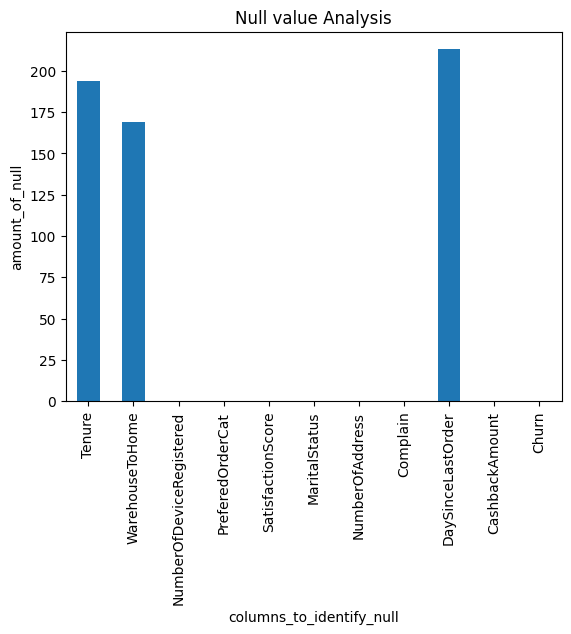

In [117]:
# visualizing the columns with high null values

null_vis.plot(kind ='bar')
plt.xlabel("columns_to_identify_null")
plt.ylabel("amount_of_null")
plt.title("Null value Analysis");

In [118]:
# finding the the total number of nunique for the following columns

nunique_vis = com_df[['PreferedOrderCat','MaritalStatus','Complain','Churn']].nunique()
nunique_vis

PreferedOrderCat    6
MaritalStatus       3
Complain            2
Churn               2
dtype: int64

Text(0.5, 1.0, 'unique values in cat columns')

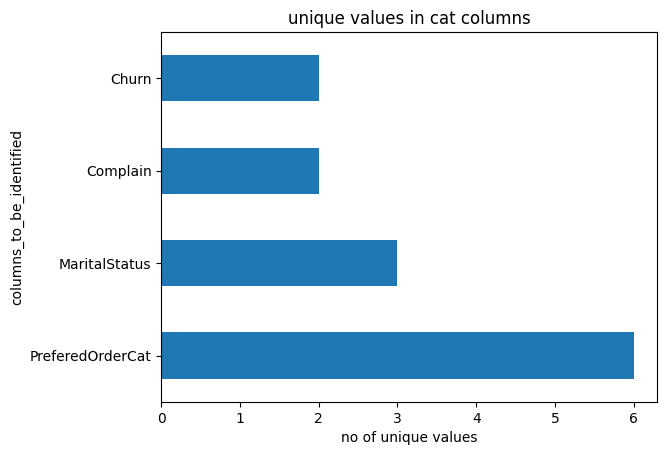

In [119]:
# visualising the nuniques

nunique_vis.plot(kind = 'barh')
plt.xlabel('no of unique values')
plt.ylabel('columns_to_be_identified')
plt.title("unique values in cat columns")

In [120]:
# observing the unique

com_df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [121]:
# order category by satisfaction

order_category_satisfaction = com_df.groupby('PreferedOrderCat')['SatisfactionScore'].mean().reset_index()
order_category_satisfaction

,PreferedOrderCat,SatisfactionScore
0,Fashion,3.085470
1,Grocery,3.095238
2,Laptop & Accessory,3.056241
3,Mobile,3.093023
4,Mobile Phone,3.148816
5,Others,3.033520


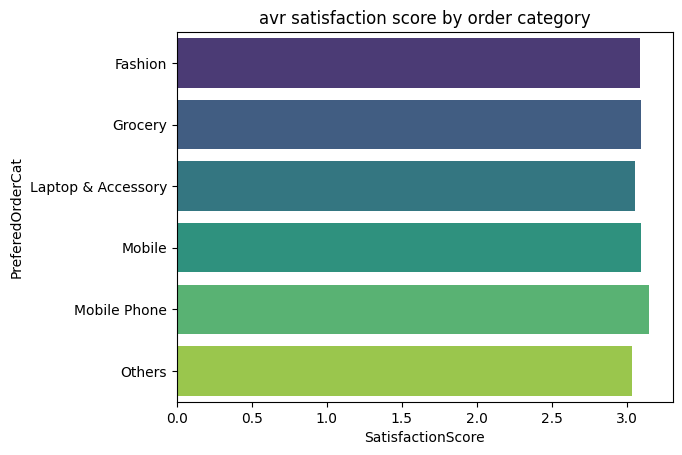

In [122]:
# visualization of order category by satisfaction

sns.barplot(x='SatisfactionScore', y='PreferedOrderCat', data=order_category_satisfaction, palette='viridis');
plt.title("avr satisfaction score by order category");

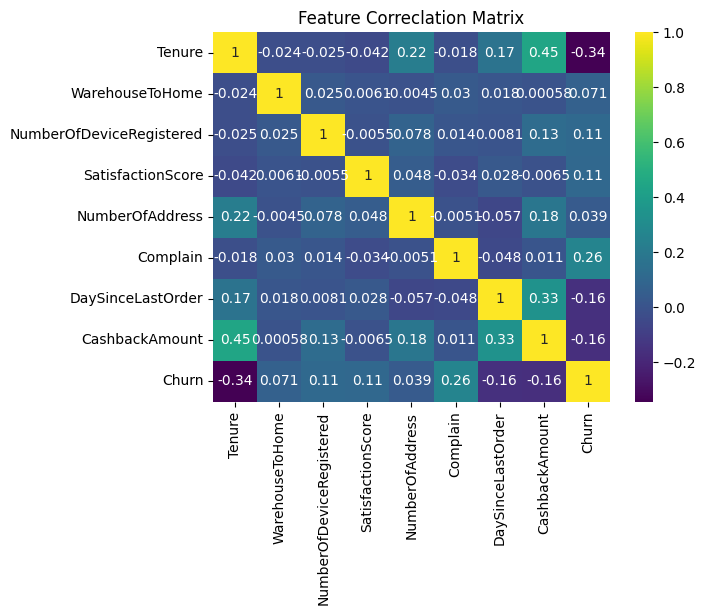

In [123]:
# correlation matrix of the numerical columns

sns.heatmap(com_df[['Tenure',	'WarehouseToHome',	'NumberOfDeviceRegistered',	'SatisfactionScore',	'NumberOfAddress',	'Complain',	'DaySinceLastOrder',	'CashbackAmount',	'Churn']].corr(), annot = True, cmap = 'viridis')
plt.title("Feature Correclation Matrix")
plt.show();

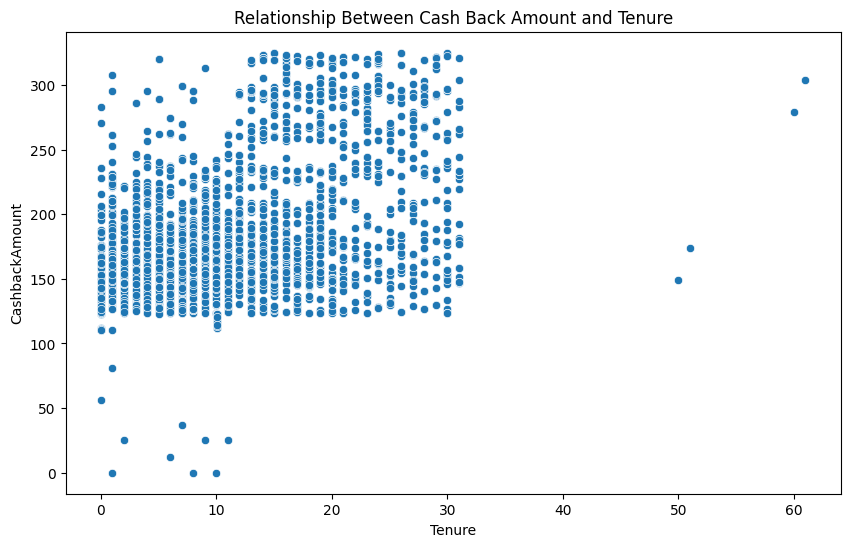

In [124]:
# vis the Relationship Between Cash Back Amount and Tenure

plt.figure(figsize=(10, 6))
sns.scatterplot(x = com_df['Tenure'], y = com_df['CashbackAmount'])
plt.title('Relationship Between Cash Back Amount and Tenure')
plt.show();

<Figure size 1000x600 with 0 Axes>

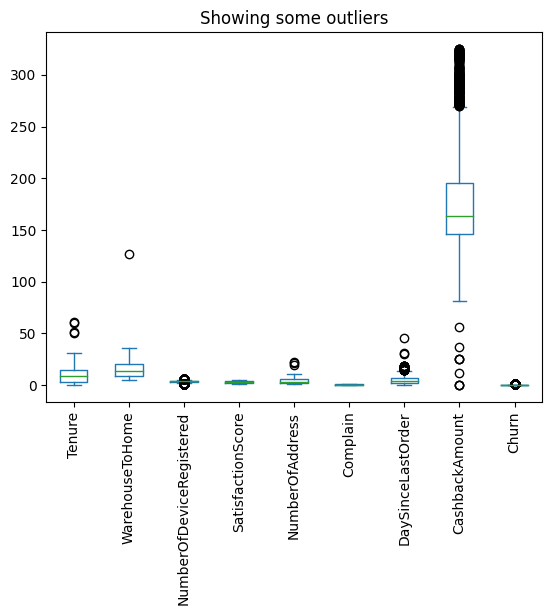

In [125]:
# detecting outliers per each column using box plots

plt.figure(figsize=(10, 6))
com_df.plot(kind = "box",)
plt.xticks(rotation = 90)
plt.title('Showing some outliers');

In [126]:
# grouping marital status by Tenure to see which one has the highest

tenure_by_marital = com_df.groupby('MaritalStatus')['Tenure'].mean().reset_index()
tenure_by_marital

,MaritalStatus,Tenure
0,Divorced,10.511325
1,Married,10.793951
2,Single,8.774579


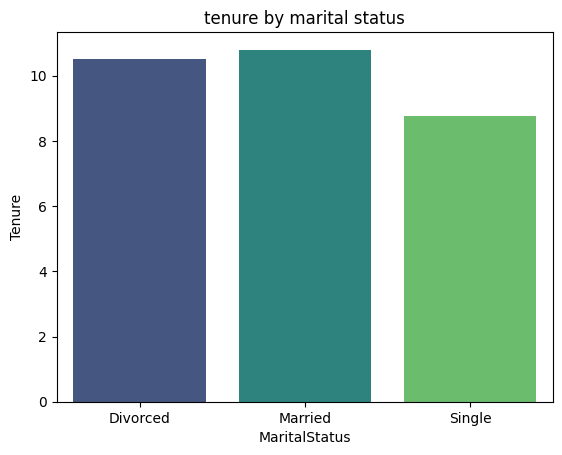

In [127]:
# visualizing marital status by Tenure to see which one has the highest

sns.barplot(x = 'MaritalStatus', y = 'Tenure', data =tenure_by_marital, palette='viridis')
plt.title("tenure by marital status");

In [128]:
# using a labelecoder to change cat to numerical since there is a sort of ranking

le = le = LabelEncoder()
com_df['MaritalStatus'] = le.fit_transform(com_df['MaritalStatus'])
com_df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,2,2,0,7.000000,143.32,0
1,7.0,25.0,4,Mobile,1,1,2,0,7.000000,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,1,5,0,7.000000,168.54,0
3,20.0,25.0,4,Fashion,3,0,7,0,4.531652,230.27,0
4,30.0,15.0,4,Others,4,2,8,0,8.000000,322.17,0


In [129]:
# changin categorical of 'PreferedOrderCat' into numerical
# Using one hot encoding
# One hot encoding is the best model performance

com_df = pd.get_dummies(com_df, columns =['PreferedOrderCat'], drop_first = True)
com_df = com_df.astype(int)
com_df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,15,29,4,3,2,2,0,7,143,0,0,1,0,0,0
1,7,25,4,1,1,2,0,7,129,0,0,0,1,0,0
2,27,13,3,1,1,5,0,7,168,0,0,1,0,0,0
3,20,25,4,3,0,7,0,4,230,0,0,0,0,0,0
4,30,15,4,4,2,8,0,8,322,0,0,0,0,0,1


In [130]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Tenure                               3941 non-null   int64
 1   WarehouseToHome                      3941 non-null   int64
 2   NumberOfDeviceRegistered             3941 non-null   int64
 3   SatisfactionScore                    3941 non-null   int64
 4   MaritalStatus                        3941 non-null   int64
 5   NumberOfAddress                      3941 non-null   int64
 6   Complain                             3941 non-null   int64
 7   DaySinceLastOrder                    3941 non-null   int64
 8   CashbackAmount                       3941 non-null   int64
 9   Churn                                3941 non-null   int64
 10  PreferedOrderCat_Grocery             3941 non-null   int64
 11  PreferedOrderCat_Laptop & Accessory  3941 non-null   int

Churn
0    3267
1     674
Name: count, dtype: int64


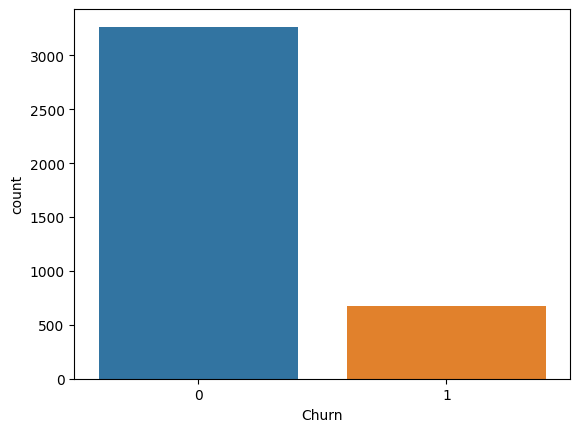

In [131]:
#showing the imbalance in Church
import seaborn as sns

sns.countplot(x=y)
print(y.value_counts())

In [132]:
X = com_df.drop(columns = 'Churn')
y = com_df['Churn']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [134]:
X_train.shape

(3152, 14)

In [135]:
y_train.shape

(3152,)

In [136]:
#train and evaluation of multiple models

models = {
    "lr": LogisticRegression(max_iter = 1000),
    "rf": RandomForestClassifier(),
    "dt": DecisionTreeClassifier(),
    "svm": SVC(),
    "knn": KNeighborsClassifier(),
    "xbg": XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
    
} 

In [ ]:
#train and evaluation of each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

🔹 lr Performance:
Accuracy: 0.8821
Confusion Matrix:
 [[641  19]
 [ 74  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       660
           1       0.74      0.43      0.54       129

    accuracy                           0.88       789
   macro avg       0.82      0.70      0.74       789
weighted avg       0.87      0.88      0.87       789

--------------------------------------------------
🔹 rf Performance:
Accuracy: 0.9506
Confusion Matrix:
 [[645  15]
 [ 24 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       660
           1       0.88      0.81      0.84       129

    accuracy                           0.95       789
   macro avg       0.92      0.90      0.91       789
weighted avg       0.95      0.95      0.95       789

--------------------------------------------------
🔹 dt Performance:
Accuracy: 0.9125
Confusi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🔹 xbg Performance:
Accuracy: 0.9417
Confusion Matrix:
 [[637  23]
 [ 23 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       660
           1       0.82      0.82      0.82       129

    accuracy                           0.94       789
   macro avg       0.89      0.89      0.89       789
weighted avg       0.94      0.94      0.94       789

--------------------------------------------------


In [ ]:
#  Why XGBoost is a Good Choice
# Stronger Churn Detection: It predicts more actual churners correctly (82% recall vs. 78% in RF).
#  Fewer Missed Churners: XGBoost reduced false negatives from 28 → 23, meaning fewer missed churned customers.
#  Handles Imbalanced Data Better: It adjusts for churners being the minority class.
# Optimized Speed & Performance: Faster training and better generalization.

# Overall, XGBoost outperforms Random Forest in recall (identifying churners).

In [139]:
#further improvement for XGBoost
params = {
    'n_estimators':[100,500,1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 20],
    'scale_pos_weight': [1,5,10]
}

In [140]:
xgb = XGBClassifier()
grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'f1')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [141]:
#final model fit
xgb = XGBClassifier(
    learning_rate =0.1 ,
    max_depth = 20,
    n_estimators =500 )


In [142]:
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict(X_test)

In [143]:
print(f"Accuracy: {accuracy_score(y_test, y_pred2):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9518
Confusion Matrix:
 [[639  21]
 [ 17 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       660
           1       0.84      0.87      0.85       129

    accuracy                           0.95       789
   macro avg       0.91      0.92      0.91       789
weighted avg       0.95      0.95      0.95       789



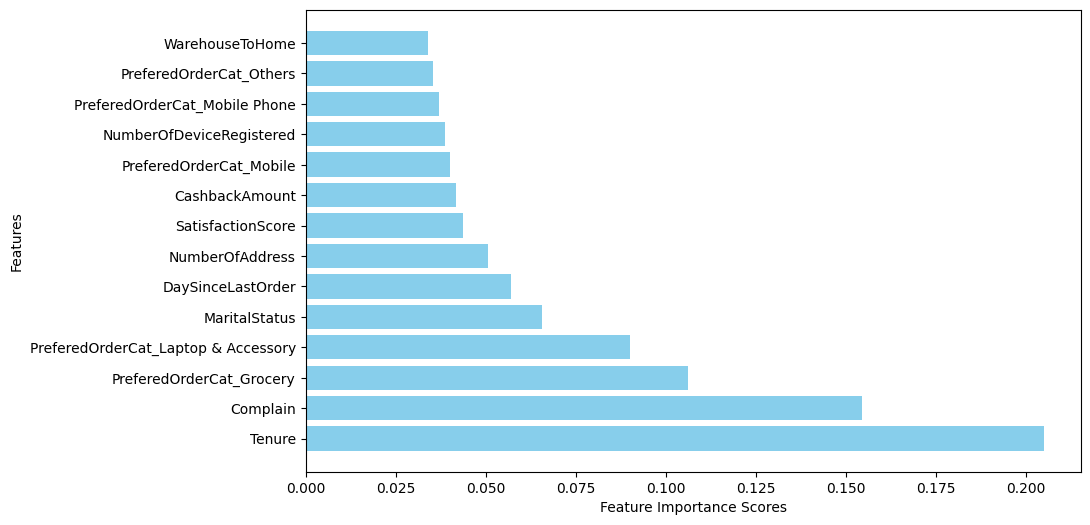

In [144]:
#Extract feature importance
feature_importance  = xgb.feature_importances_
features = X_train.columns

#create a dataframe for data Visualization
importance_df = pd.DataFrame({'Feature':features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

#plot
plt.figure(figsize = (10,6))
plt.barh(importance_df['Feature'], importance_df["Importance"], color = 'skyblue')
plt.xlabel("Feature Importance Scores")
plt.ylabel('Features')
plt.gca().invert_yaxis
plt.show()

<Figure size 1000x600 with 0 Axes>

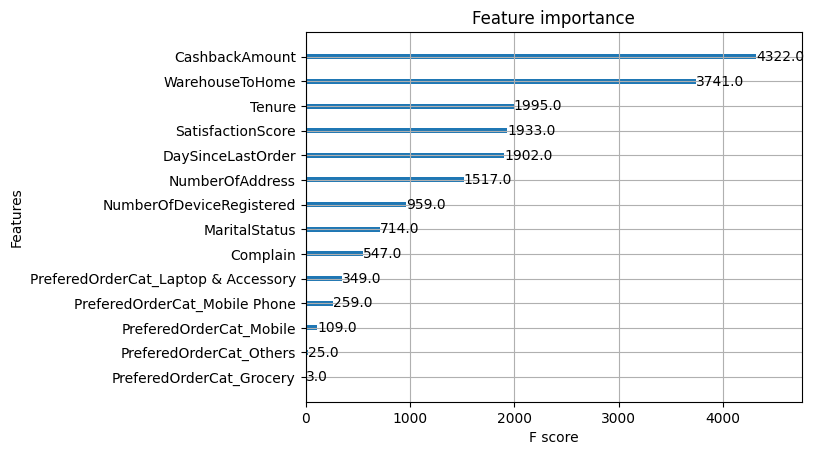

In [145]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb)  # `xgb` is your trained model
plt.show();

In [148]:
import joblib

# Save the trained model
joblib.dump(xgb, "churn_model.pkl")

print("Model saved successfully!")

Model saved successfully!
